In [1]:
!pip install selenium --quiet

In [2]:
# import warnings
# warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12

In [3]:
url = 'https://www.shine.com/job-search/jobs?job_type=2&top_companies_boost=true&sort=1'
response = requests.get(url)
response

<Response [200]>

In [42]:
soup = BeautifulSoup(response.text,'html.parser')
html = soup.find_all('div')
print(html)

[<div id="__next"><header><div class="slideMenuWrap"><nav class="slideMenu"><div class="slideMenu__header"><div class="slideMenu__header--info"><strong>Welcome!</strong><div class="d-flex mt-10"><a class="btn btn-outline-secondary mr-15" href="/myshine/login/">Sign in</a><a class="btn btn-outline-secondary" href="/registration/">Register</a></div></div></div><ul class="tabs"></ul><ul class="site-links"><li><a href="https://learning.shine.com/talenteconomy/?utm_source=www.shine.com&amp;utm_medium=searchdefault&amp;utm_campaign=msite_links">Blog</a></li><li><a href="/aboutus">About Us</a></li><li><a href="/contactus">Contact Us</a></li><li><a href="/faqs">FAQs</a></li><li><a class="" data-for="andriod" data-type="leftPanel" href="" id="id_downloadapp">Download App</a></li><li><a href="/contactus?type=reportJobPosting">Report a Job Posting</a></li></ul><ul class="other-links"><li><span class="other-links--left">Employers</span><span class="other-links--right"><a href="https://recruiter.sh

In [5]:
req = soup.select('div h2[itemprop="name"]')
titles = [r.text for r in req]
print(titles)

['Walk in Drive For Relationship Managers  || Credit Life ...', 'Sourcing Specialist', 'Tele Sales Executive', 'Sales Executive', 'Property Consultant', ' for sales manager', 'Marketing Executive', 'Legal Executive', 'Customer Service Associate', 'Sales Executive', 'Business Development Executive', 'Mega Walkin Drive for a leading bank in hyderabad', 'Walk - in Drive for Customer Care Executives', 'Walk in Drive For Agency Manager | Direct Marketing (Li ...', 'Business Consultant', 'Field Sales Executive', 'Sales Manager', 'Inside Sales Specialist', 'Sales And Marketing Managers', 'Sales Executive']


In [6]:
titles[:5]

['Walk in Drive For Relationship Managers  || Credit Life ...',
 'Sourcing Specialist',
 'Tele Sales Executive',
 'Sales Executive',
 'Property Consultant']

In [7]:
titles1 = [t.replace("|","") for t in titles]
titles = [t.replace("  ", "") for t in titles1]

In [8]:
titles[:5]

['Walk in Drive For Relationship Managers Credit Life ...',
 'Sourcing Specialist',
 'Tele Sales Executive',
 'Sales Executive',
 'Property Consultant']

In [46]:
orgs = soup.find_all('div', class_='jobCard_jobCard_cName__mYnow')
orgs1 = [o.text for o in orgs]
print(orgs1)

['ADITYA BIRLA SUN LIFE INSURANCE COM...', 'MYZEON VENTURES PRIVATE LIMITED', 'FIXENT INFOTECH PRIVATE LIMITED', 'JANARDAN FARMS AND RESORTS LLP', 'LivNest Technologies Pvt Ltd', 'xpress careers consulting Hiring Fo...', 'SWELLWELL MINECHEM PVT LTD', 'JANARDAN FARMS AND RESORTS LLP', 'TRAIDENT BRAINS PRIVATE LIMITED', 'JANARDAN FARMS AND RESORTS LLP', 'JANARDAN FARMS AND RESORTS LLP', 'Purple Patch Training And Consultin...', 'Stanplus Technologies Private Limit...', 'ADITYA BIRLA SUN LIFE INSURANCE COM...', 'Strivik Business Solutions Pvt. Ltd...', 'Dezire HR Services Hiring For DHS', 'JANARDAN FARMS AND RESORTS LLP', 'ULTIMA CHEMICALS', 'JANARDAN FARMS AND RESORTS LLP', 'Hinduja Global Solutions Limited (H...']


In [10]:
[o for o in orgs1][:5]

['ADITYA BIRLA SUN LIFE INSURANCE COM...',
 'MYZEON VENTURES PRIVATE LIMITED',
 'FIXENT INFOTECH PRIVATE LIMITED',
 'JANARDAN FARMS AND RESORTS LLP',
 'LivNest Technologies Pvt Ltd']

In [11]:
sub_str = "Hiring"

In [47]:
[o.split(sub_str)[0] for o in orgs1][:5]

['ADITYA BIRLA SUN LIFE INSURANCE COM...',
 'MYZEON VENTURES PRIVATE LIMITED',
 'FIXENT INFOTECH PRIVATE LIMITED',
 'JANARDAN FARMS AND RESORTS LLP',
 'LivNest Technologies Pvt Ltd']

In [48]:
companies = [o.split(sub_str)[0] for o in orgs1]

In [49]:
companies[:5]

['ADITYA BIRLA SUN LIFE INSURANCE COM...',
 'MYZEON VENTURES PRIVATE LIMITED',
 'FIXENT INFOTECH PRIVATE LIMITED',
 'JANARDAN FARMS AND RESORTS LLP',
 'LivNest Technologies Pvt Ltd']

In [15]:
loc = soup.find_all('div', class_='jobCard_jobCard_lists__fdnsc')

In [57]:
[l.div.text for l in loc][:5]

['1 to 6 Yrs', '0 to 3 Yrs', '0 to 2 Yrs', '2 to 5 Yrs', '1 to 5 Yrs']

In [58]:
loc1 = [l.div.text for l in loc]
print(loc1)

['1 to 6 Yrs', '0 to 3 Yrs', '0 to 2 Yrs', '2 to 5 Yrs', '1 to 5 Yrs', '5 to 10 Yrs', '0 to 5 Yrs', '2 to 5 Yrs', '0 to 1 Yr', '2 to 5 Yrs', '2 to 5 Yrs', '2 to 5 Yrs', '1 to 6 Yrs', '2 to 7 Yrs', '1 to 5 Yrs', '2 to 4 Yrs', '2 to 5 Yrs', '0 to 1 Yr', '2 to 5 Yrs', '0 to 4 Yrs']


In [18]:
[l.replace("+", ",") for l in loc1][:5]

['1 to 6 Yrs', '0 to 3 Yrs', '0 to 2 Yrs', '2 to 5 Yrs', '1 to 5 Yrs']

In [62]:
loc2 = [l.replace("+", ",") for l in loc1]
print(loc2)

['1 to 6 Yrs', '0 to 3 Yrs', '0 to 2 Yrs', '2 to 5 Yrs', '1 to 5 Yrs', '5 to 10 Yrs', '0 to 5 Yrs', '2 to 5 Yrs', '0 to 1 Yr', '2 to 5 Yrs', '2 to 5 Yrs', '2 to 5 Yrs', '1 to 6 Yrs', '2 to 7 Yrs', '1 to 5 Yrs', '2 to 4 Yrs', '2 to 5 Yrs', '0 to 1 Yr', '2 to 5 Yrs', '0 to 4 Yrs']


In [75]:
# pattern  = r'[ to , Yrs]'
# strpattern = r'[a-z]'

In [77]:
pattern = r'(\d+) to (\d+) Yrs'  # Updated pattern to match digit to digit pattern
replacement = r'\1-\2'  # Replacement to keep the matched digits with a hyphen in between

modified_strings = [re.sub(pattern, replacement, l) for l in loc2][:5]
print(modified_strings)

['1-6', '0-3', '0-2', '2-5', '1-5']


In [78]:
location = [re.sub(pattern, '', l) for l in loc2]

In [79]:
experience = [l.find_all('div')[-1].text for l in loc]

In [80]:
experience[:5]

['', 'Delhi', '', '', '']

In [81]:
vacancies = soup.find_all('ul', class_='jobCard_jobCard_jobDetail__jD82J')

In [82]:
[v.text.split("Positions")[0] for v in vacancies ]

['Be an Early ApplicantRegular10 ',
 'Be an Early ApplicantRegular10 ',
 'Be an Early ApplicantRegular10 ',
 'Regular5 ',
 'Be an Early ApplicantRegular10 ',
 'Be an Early ApplicantRegular10 ',
 'Be an Early ApplicantRegular6 ',
 'Be an Early ApplicantRegular2 ',
 'Be an Early ApplicantRegular30 ',
 'Regular5 ',
 'Regular5 ',
 'Be an Early ApplicantRegular30 ',
 'Be an Early ApplicantRegular10 ',
 'Be an Early ApplicantRegular10 ',
 'Be an Early ApplicantRegular10 ',
 'Regular10 ',
 'Regular5 ',
 'Be an Early ApplicantRegular30 ',
 'Regular5 ',
 'Regular99 ']

In [83]:
[v.text.split("Positions")[0][-3:-1] for v in vacancies ]

['10',
 '10',
 '10',
 'r5',
 '10',
 '10',
 'r6',
 'r2',
 '30',
 'r5',
 'r5',
 '30',
 '10',
 '10',
 '10',
 '10',
 'r5',
 '30',
 'r5',
 '99']

In [84]:
vac = [v.text.split("Positions")[0][-3:] for v in vacancies ]
vac = [v.replace('la', '1') for v in vac]
vac = [re.sub(strpattern, '', l) for l in vac]

In [85]:
vacancies= [v.replace(' ','') for v in vac]

In [86]:
vacancies[:5]

['10', '10', '10', '5', '10']

In [87]:
df = pd.DataFrame({'Titles':titles, 'Firm Name': companies, 'Job Location':location, 'Experience':experience,
                   'Positions': vacancies})

In [88]:
df.head()

,Titles,Firm Name,Job Location,Experience,Positions
0,Walk in Drive For Relationship Managers Credit...,ADITYA BIRLA SUN LIFE INSURANCE COM...,,,10
1,Sourcing Specialist,MYZEON VENTURES PRIVATE LIMITED,,Delhi,10
2,Tele Sales Executive,FIXENT INFOTECH PRIVATE LIMITED,,,10
3,Sales Executive,JANARDAN FARMS AND RESORTS LLP,,,5
4,Property Consultant,LivNest Technologies Pvt Ltd,,,10


In [89]:
df['Titles'].duplicated().sum()

2

In [90]:
df = df.drop_duplicates(subset=['Titles'])

In [91]:
df.head()

,Titles,Firm Name,Job Location,Experience,Positions
0,Walk in Drive For Relationship Managers Credit...,ADITYA BIRLA SUN LIFE INSURANCE COM...,,,10
1,Sourcing Specialist,MYZEON VENTURES PRIVATE LIMITED,,Delhi,10
2,Tele Sales Executive,FIXENT INFOTECH PRIVATE LIMITED,,,10
3,Sales Executive,JANARDAN FARMS AND RESORTS LLP,,,5
4,Property Consultant,LivNest Technologies Pvt Ltd,,,10


In [92]:
#Changing Dtype
df['Positions'] = df['Positions'].astype('int32')
#Creating a New Column
numpattern = r'[0]'
df['Category'] = ['Fresher' if '0' in i else 'Experienced' for i in df['Experience']]

In [93]:
#DataFrame created based on Descending values 
df.sort_values(by='Positions', ascending=False)

,Titles,Firm Name,Job Location,Experience,Positions,Category
17,Inside Sales Specialist,ULTIMA CHEMICALS,0 to 1 Yr,,30,Experienced
8,Customer Service Associate,TRAIDENT BRAINS PRIVATE LIMITED,0 to 1 Yr,,30,Experienced
11,Mega Walkin Drive for a leading bank in hyderabad,Purple Patch Training And Consultin...,,,30,Experienced
0,Walk in Drive For Relationship Managers Credit...,ADITYA BIRLA SUN LIFE INSURANCE COM...,,,10,Experienced
15,Field Sales Executive,Dezire HR Services,,,10,Experienced
2,Tele Sales Executive,FIXENT INFOTECH PRIVATE LIMITED,,,10,Experienced
4,Property Consultant,LivNest Technologies Pvt Ltd,,,10,Experienced
5,for sales manager,xpress careers consulting,,,10,Experienced
1,Sourcing Specialist,MYZEON VENTURES PRIVATE LIMITED,,Delhi,10,Experienced
12,Walk - in Drive for Customer Care Executives,Stanplus Technologies Private Limit...,,,10,Experienced


In [94]:
df.head()

,Titles,Firm Name,Job Location,Experience,Positions,Category
0,Walk in Drive For Relationship Managers Credit...,ADITYA BIRLA SUN LIFE INSURANCE COM...,,,10,Experienced
1,Sourcing Specialist,MYZEON VENTURES PRIVATE LIMITED,,Delhi,10,Experienced
2,Tele Sales Executive,FIXENT INFOTECH PRIVATE LIMITED,,,10,Experienced
3,Sales Executive,JANARDAN FARMS AND RESORTS LLP,,,5,Experienced
4,Property Consultant,LivNest Technologies Pvt Ltd,,,10,Experienced


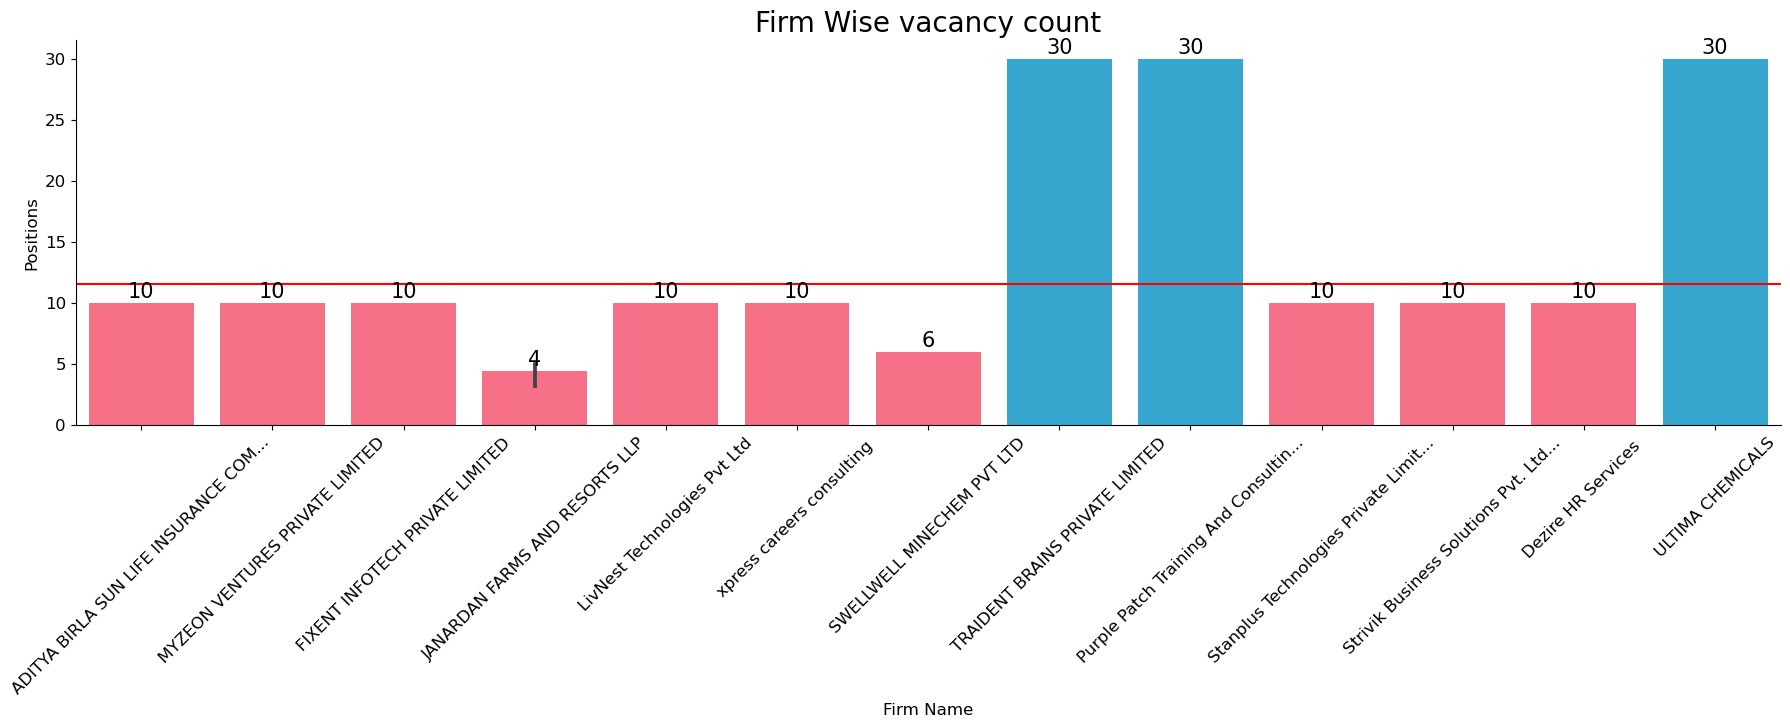

In [95]:
plt.figure(figsize=(22,5), dpi=100)
ax = sns.barplot(x=df['Firm Name'], y=df['Positions'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Firm Wise vacancy count', fontsize=20)
plt.axhline(df.Positions.mean(), color='red')

#Annotating each bar
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')

#coloring each bar based on a condition if the bar value is greator or less than count of positions for a given firm 
for i in range(len(ax.patches)):
    #getting the count of each bar
    counts = [p.get_height() for p in ax.patches]
    #getting the colors based on the condition for each bar
    colors = ['#38A7D0' if j > df.Positions.mean() else '#F67088' for j in counts]
    #passing the color for each bar
    ax.patches[i].set_facecolor(colors[i])  
    
plt.xticks(rotation=45)
plt.show()

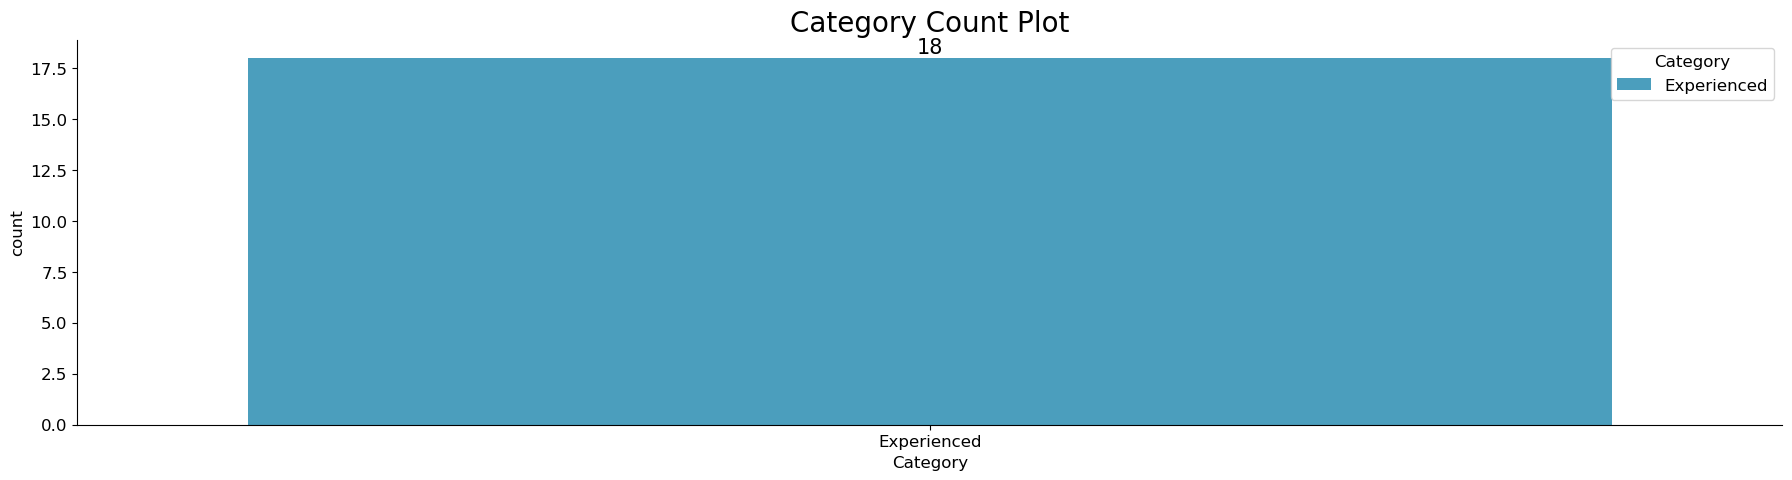

In [96]:
palette = ['#38A7D0', '#F67088']
plt.figure(figsize=(22,5), dpi=100)
ax = sns.countplot(data =df,x=df['Category'], hue=df['Category'], dodge=False, palette=palette)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                 ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Category Count Plot', fontsize=20)
plt.show()

In [97]:
# Specify the file path and name for the Excel file
output_file = "C:/Users/RBI/OneDrive/Desktop/ISB-AMPBA/TERM 2/FOUNDATIONAL PROJECT 1 (FP-1)/FP1.xlsx"

# Export the DataFrame to Excel
df.to_excel(output_file, index=False)

PermissionError: [Errno 13] Permission denied: 'C:/Users/RBI/OneDrive/Desktop/ISB-AMPBA/TERM 2/FOUNDATIONAL PROJECT 1 (FP-1)/FP1.xlsx'